In [16]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

from traffic.core import Traffic

In [17]:
gen_to = Traffic.from_file("../deep_traffic_generation/data/generated_datasets/gen_takeoffs_LFPO_07.pkl")
gen_ldng = Traffic.from_file("../deep_traffic_generation/data/generated_datasets/gen_landings_LFPO_06.pkl")

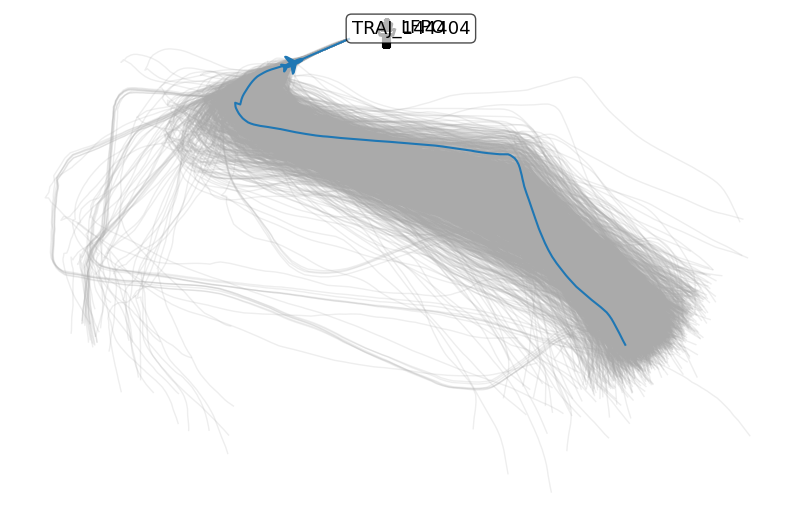

In [18]:
from traffic.core import Traffic
import matplotlib.pyplot as plt
from traffic.core.projection import EuroPP
from traffic.data import navaids
from traffic.data import airports


with plt.style.context("traffic"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7), subplot_kw=dict(projection=EuroPP()))
    ax.figure

    gen_ldng[:2000].plot(ax, alpha=0.2)

    k =  np.random.randint(len(gen_ldng))
    gen_ldng[k].plot(ax, color="#1f77b4", lw=1.5)
    gen_ldng[k].at_ratio(0.85).plot(
        ax,
        color="#1f77b4",
        zorder=3,
        shift=dict(units="dots", x=60, y=30),
        text_kw=dict(
            fontname="Fira Sans",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.7, zorder=5),
        ),
    )

    airports["LFPO"].point.plot(ax)

    plt.show()

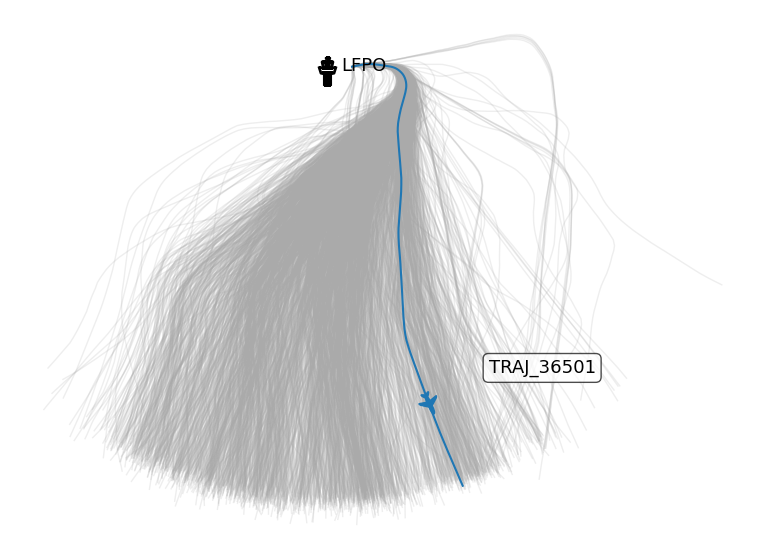

In [19]:
from traffic.core import Traffic
import matplotlib.pyplot as plt
from traffic.core.projection import EuroPP
from traffic.data import navaids
from traffic.data import airports


with plt.style.context("traffic"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7), subplot_kw=dict(projection=EuroPP()))
    ax.figure

    gen_to[:2000].plot(ax, alpha=0.2)

    k =  np.random.randint(len(gen_ldng))
    gen_to[k].plot(ax, color="#1f77b4", lw=1.5)
    gen_to[k].at_ratio(0.85).plot(
        ax,
        color="#1f77b4",
        zorder=3,
        shift=dict(units="dots", x=60, y=30),
        text_kw=dict(
            fontname="Fira Sans",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.7, zorder=5),
        ),
    )

    airports["LFPO"].point.plot(ax)

    plt.show()

In [20]:
with open("../tcas_generation/los_LFPO_06_07.json") as jsonFile:
    data_los = json.load(jsonFile)
    jsonFile.close()

#distance couldn't be calculated
print(sum(x is None for x in data_los))
df_los = pd.DataFrame(list(filter(lambda x: x is not None, data_los)))

0


In [25]:
df_los.query("los == True")

,id_to,id_ldng,delta_t,los
204,TRAJ_10018,TRAJ_10018,-24.204174,True
2685,TRAJ_102412,TRAJ_102412,-269.807003,True
3272,TRAJ_102941,TRAJ_102941,-308.034497,True
5546,TRAJ_104989,TRAJ_104989,-8.509622,True
8189,TRAJ_107367,TRAJ_107367,-222.424027,True
...,...,...,...,...
192816,TRAJ_93532,TRAJ_93532,-272.531742,True
194645,TRAJ_95179,TRAJ_95179,98.965435,True
196516,TRAJ_96863,TRAJ_96863,5.215686,True
198974,TRAJ_99075,TRAJ_99075,-354.350824,True


In [22]:
df_los.query("los == True").shape[0]/df_los.shape[0]

0.00089

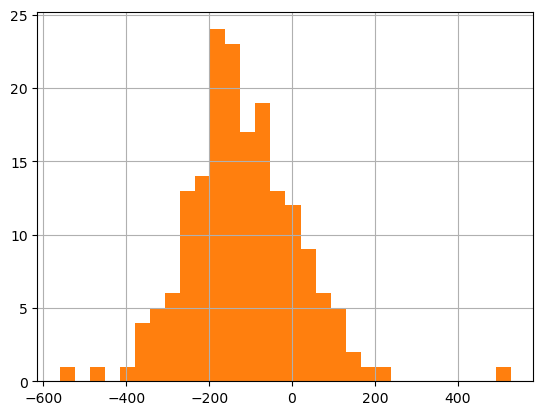

In [24]:
df_los.query("los == True").delta_t.hist(bins = 30)
plt.show()